<a href="https://colab.research.google.com/github/mpiatek26/Classify_traffic_signs_using_LeNet_Architecture_in_keras/blob/main/Classify_traffic_signs_using_Le_Net_Architecture_in_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import data

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# import libraries
import pickle
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [7]:
# The pickle module implements binary protocols for serializing and de-serializing a Python object structure.
with open("train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [8]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [9]:
X_train.shape

(34799, 32, 32, 3)

In [10]:
y_train.shape

(34799,)

Image exploration

36

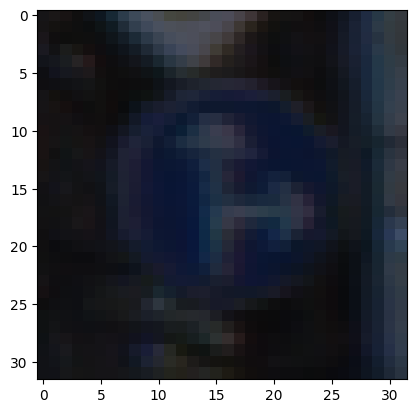

In [11]:
i = 1001
plt.imshow(X_train[i]) # Show images are not shuffled
y_train[i]

Data Preparation

In [12]:
## Shuffle the dataset
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [13]:
X_train_gray = np.sum(X_train/3, axis=3, keepdims=True)
X_test_gray  = np.sum(X_test/3, axis=3, keepdims=True)
X_validation_gray  = np.sum(X_validation/3, axis=3, keepdims=True)

In [14]:
X_train_gray_norm = (X_train_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128

In [15]:
X_train_gray.shape

(34799, 32, 32, 1)

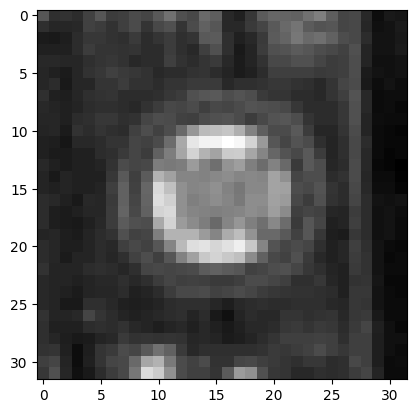

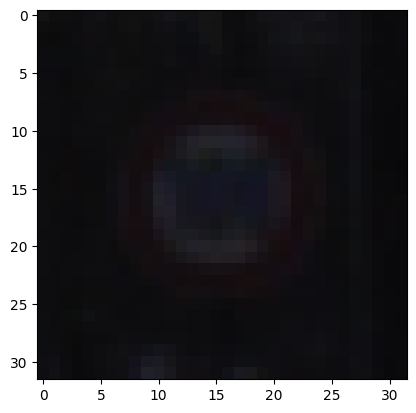

In [16]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(X_train[i])

Model training

The model consists of the following layers:

- STEP 1: THE FIRST CONVOLUTIONAL LAYER #1
    - Input = 32x32x1
    - Output = 28x28x6
    - Output = (Input-filter+1)/Stride* => (32-5+1)/1=28
    - Used a 5x5 Filter with input depth of 3 and output depth of 6
    - Apply a RELU Activation function to the output
    - pooling for input, Input = 28x28x6 and Output = 14x14x6


    * Stride is the amount by which the kernel is shifted when the kernel is passed over the image.

- STEP 2: THE SECOND CONVOLUTIONAL LAYER #2
    - Input = 14x14x6
    - Output = 10x10x16
    - Layer 2: Convolutional layer with Output = 10x10x16
    - Output = (Input-filter+1)/strides => 10 = 14-5+1/1
    - Apply a RELU Activation function to the output
    - Pooling with Input = 10x10x16 and Output = 5x5x16

- STEP 3: FLATTENING THE NETWORK
    - Flatten the network with Input = 5x5x16 and Output = 400

- STEP 4: FULLY CONNECTED LAYER
    - Layer 3: Fully Connected layer with Input = 400 and Output = 120
    - Apply a RELU Activation function to the output

- STEP 5: ANOTHER FULLY CONNECTED LAYER
    - Layer 4: Fully Connected Layer with Input = 120 and Output = 84
    - Apply a RELU Activation function to the output

- STEP 6: FULLY CONNECTED LAYER
    - Layer 5: Fully Connected layer with Input = 84 and Output = 43

In [17]:
# Import train_test_split from scikit library

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split

In [18]:
image_shape = X_train_gray[i].shape

In [19]:
cnn_model = Sequential()

cnn_model.add(Conv2D(filters=6, kernel_size=(5, 5), activation='relu', input_shape=(32,32,1)))
cnn_model.add(AveragePooling2D())

cnn_model.add(Conv2D(filters=16, kernel_size=(5, 5), activation='relu'))
cnn_model.add(AveragePooling2D())

cnn_model.add(Flatten())

cnn_model.add(Dense(units=120, activation='relu'))

cnn_model.add(Dense(units=84, activation='relu'))

cnn_model.add(Dense(units=43, activation = 'softmax'))

In [23]:
cnn_model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

In [25]:
history = cnn_model.fit(X_train_gray_norm,
                        y_train,
                        batch_size=500,
                        epochs=50,
                        verbose=1,
                        validation_data = (X_validation_gray_norm,y_validation))

Epoch 1/50
70/70 [==============================] - 19s 248ms/step - loss: 3.0655 - accuracy: 0.2055 - val_loss: 2.5458 - val_accuracy: 0.3000
Epoch 2/50
70/70 [==============================] - 18s 255ms/step - loss: 1.5217 - accuracy: 0.5748 - val_loss: 1.3016 - val_accuracy: 0.6136
Epoch 3/50
70/70 [==============================] - 18s 254ms/step - loss: 0.8789 - accuracy: 0.7427 - val_loss: 1.0519 - val_accuracy: 0.6821
Epoch 4/50
70/70 [==============================] - 18s 261ms/step - loss: 0.6380 - accuracy: 0.8186 - val_loss: 0.8299 - val_accuracy: 0.7567
Epoch 5/50
70/70 [==============================] - 18s 261ms/step - loss: 0.5093 - accuracy: 0.8597 - val_loss: 0.7766 - val_accuracy: 0.7803
Epoch 6/50
70/70 [==============================] - 17s 243ms/step - loss: 0.4338 - accuracy: 0.8804 - val_loss: 0.7815 - val_accuracy: 0.7667
Epoch 7/50
70/70 [==============================] - 17s 246ms/step - loss: 0.3771 - accuracy: 0.8987 - val_loss: 0.6948 - val_accuracy: 0.8086

Model Evaluation

In [26]:
score = cnn_model.evaluate(X_test_gray_norm, y_test,verbose=0)
print('Test Accuracy : {:.4f}'.format(score[1]))

Test Accuracy : 0.8653


In [27]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

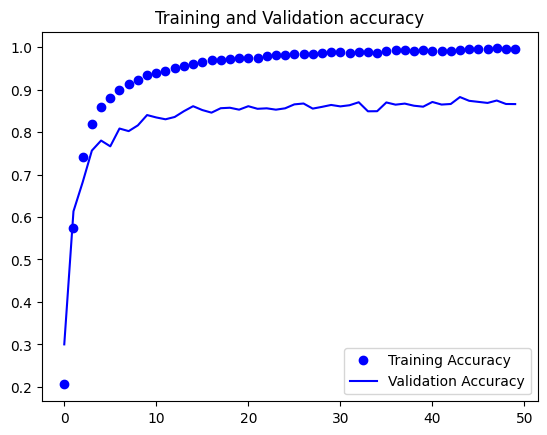

In [29]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

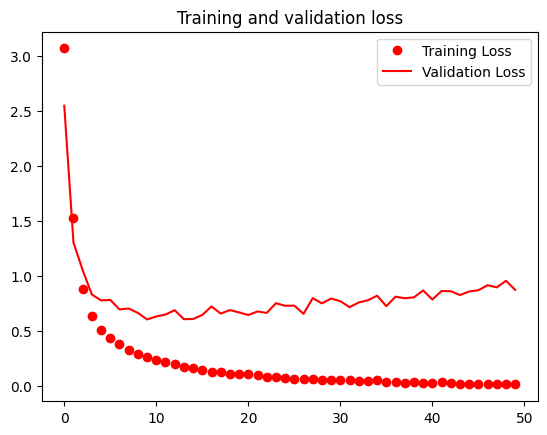

In [30]:
plt.plot(epochs, loss, 'ro', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [32]:
#get the predictions for the test data
predictions = cnn_model.predict(X_test_gray_norm)

395/395 [==============================] - 5s 13ms/step


In [33]:
# Convert predictions to class labels
predicted_classes = np.argmax(predictions, axis=1)

In [34]:
#get the indices to be plotted
y_true = y_test

<Axes: >

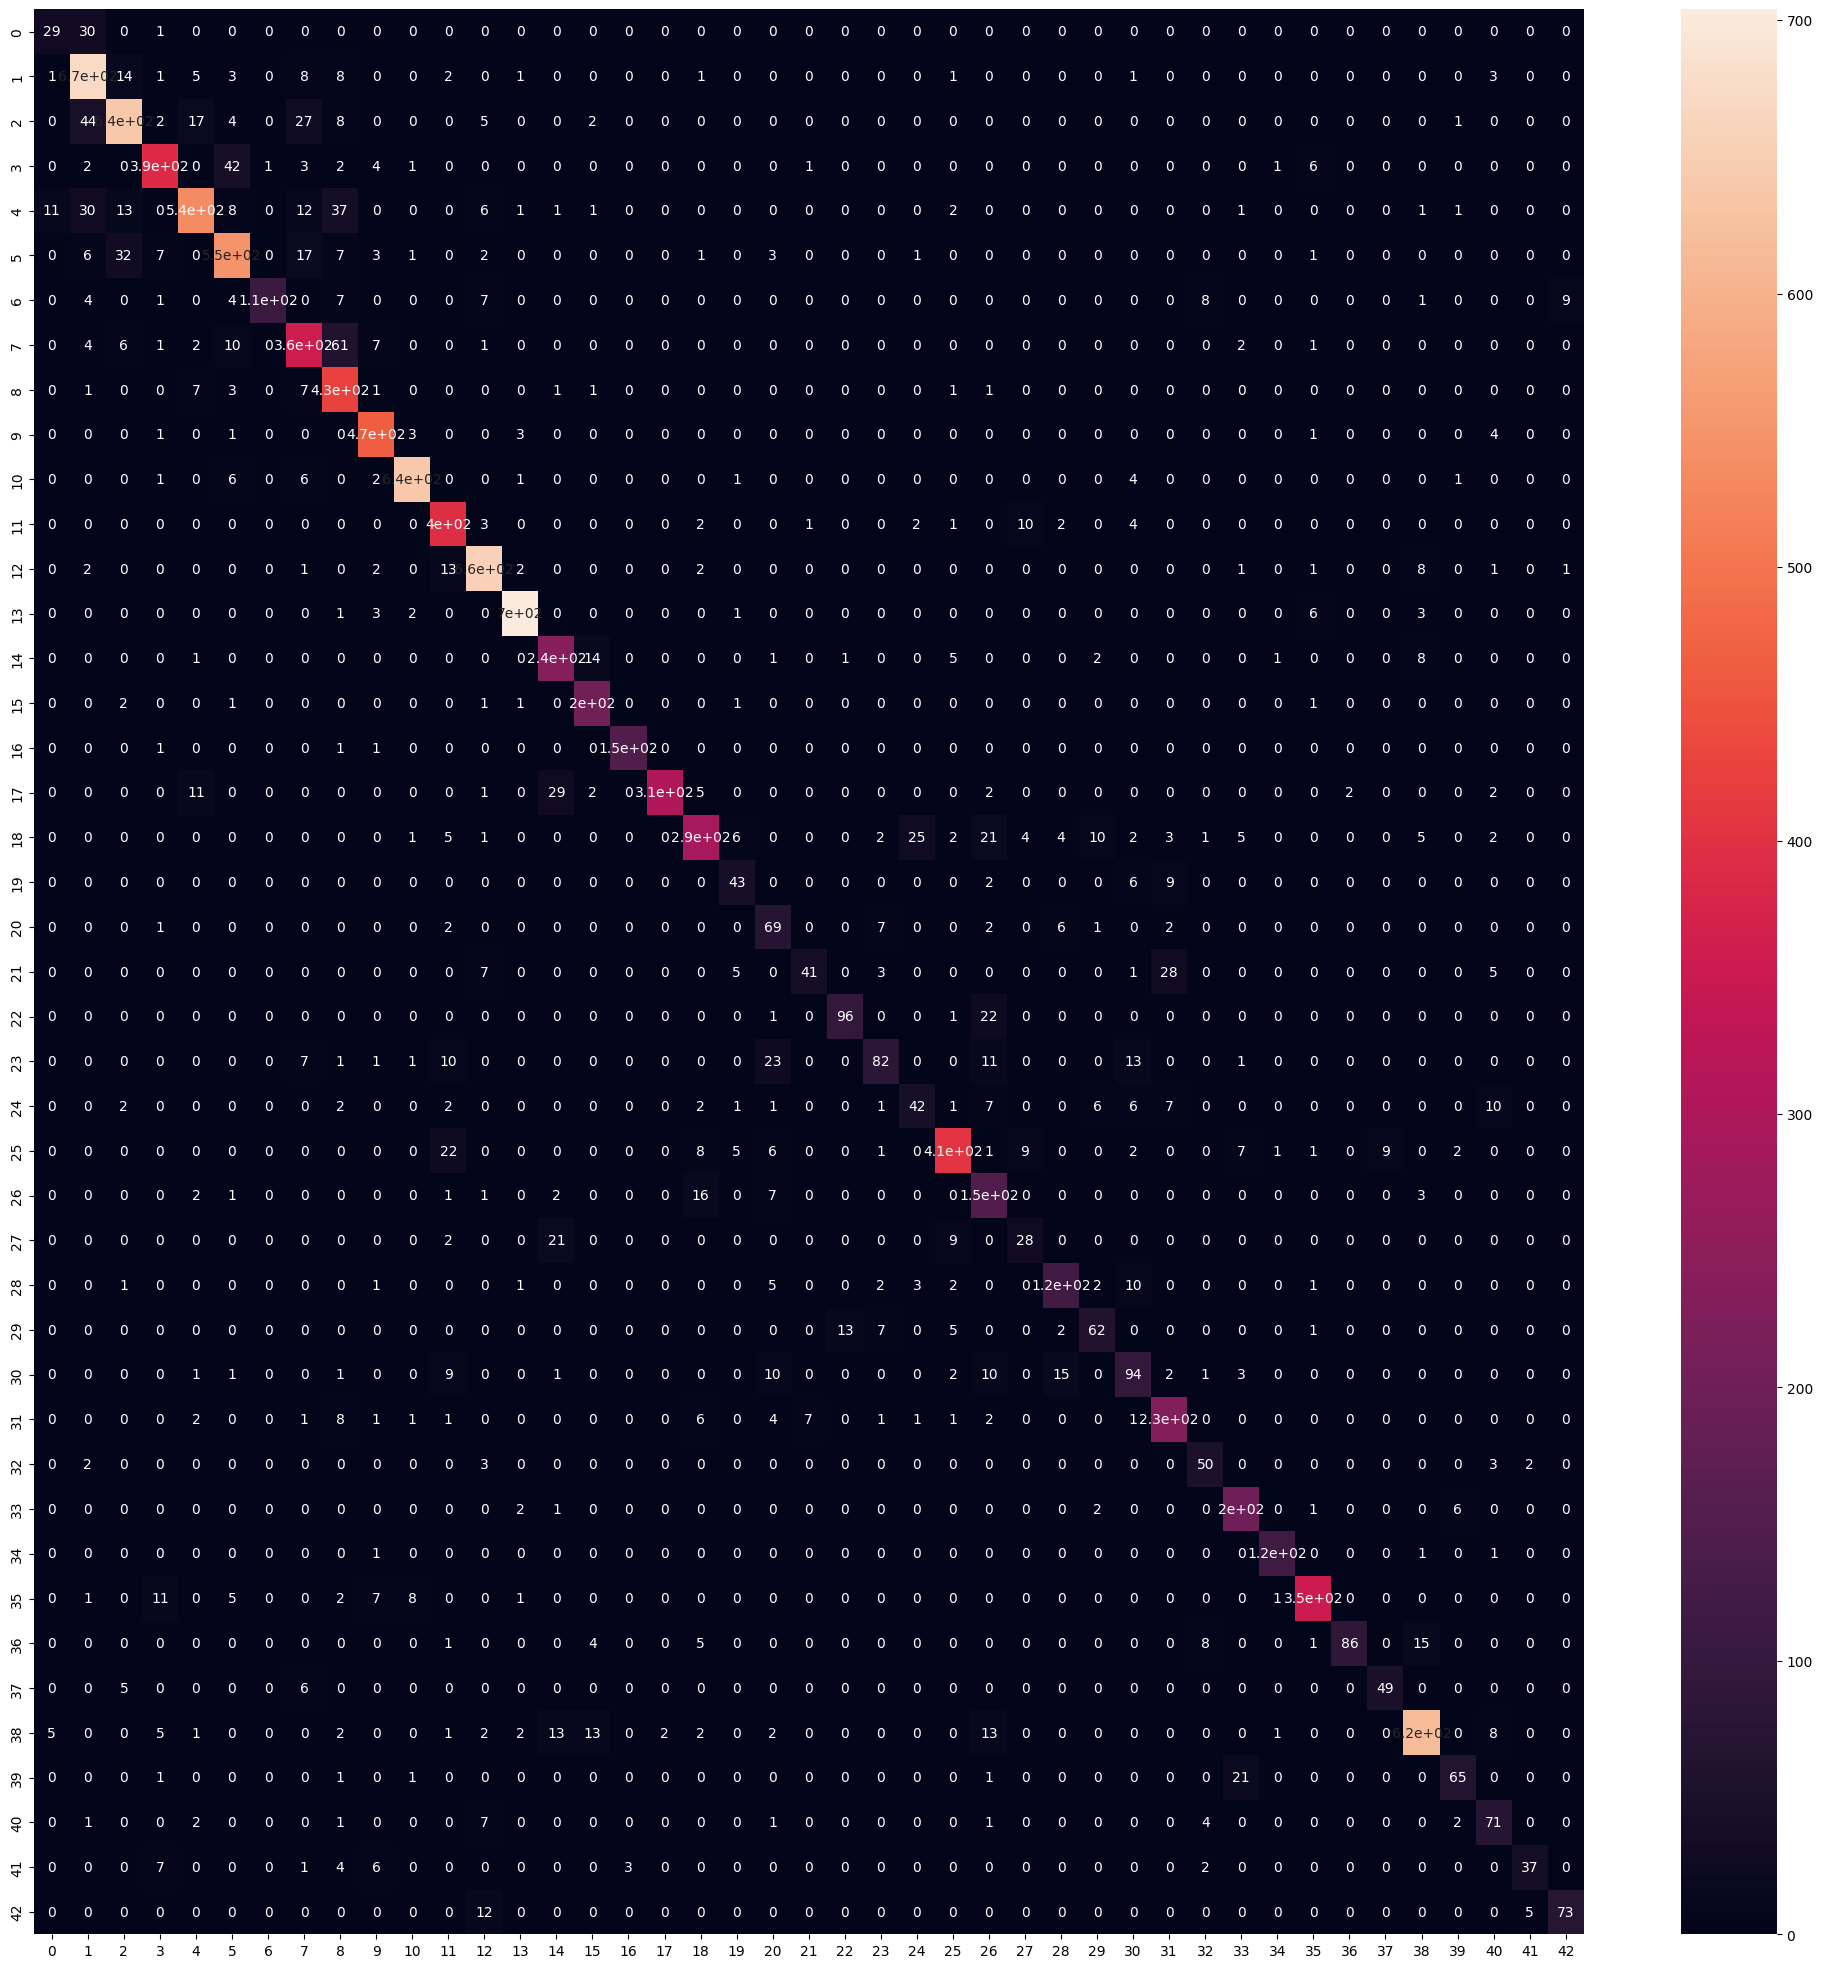

In [35]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25,25))
sns.heatmap(cm, annot=True)

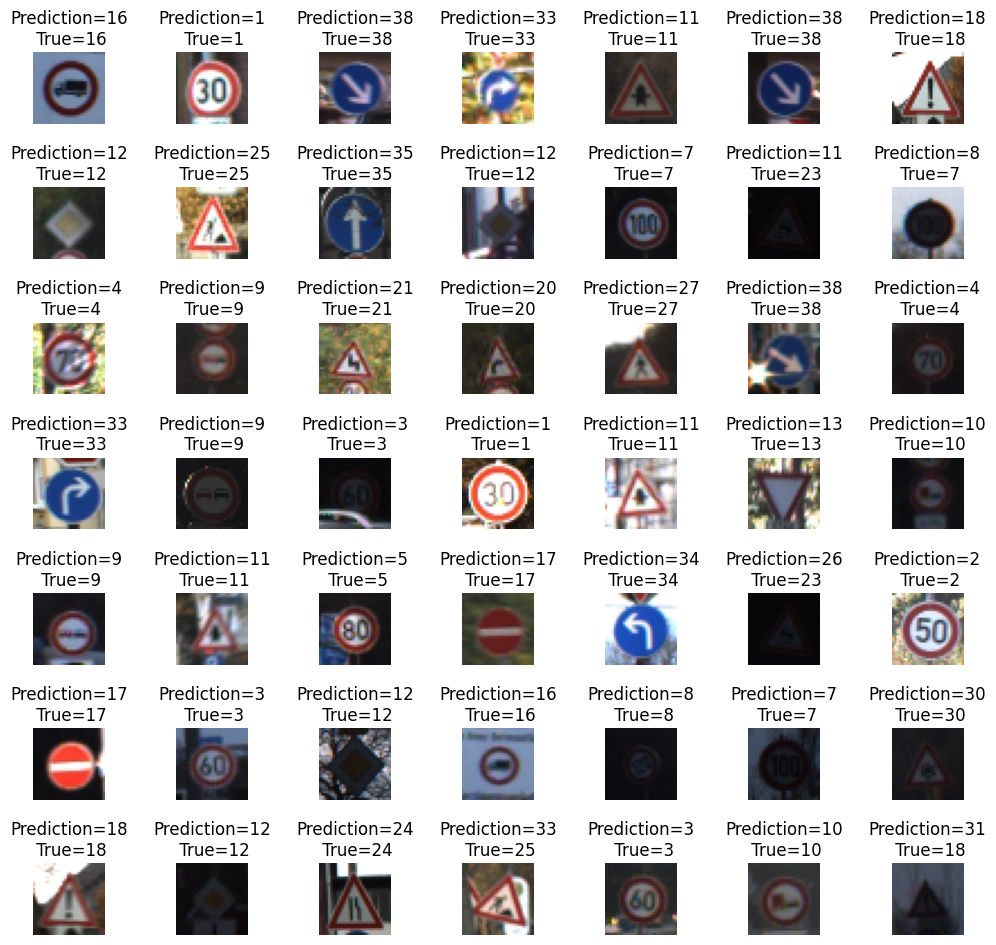

In [36]:
L = 7
W = 7
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel() #

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i])
    axes[i].set_title("Prediction={}\n True={}".format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace=1)